In [5]:
# Copyright (C) 2021-2022 Katherine Xie - All Rights Reserved.

# Generates figures to display results of my research
# Author: Katherine Xie
# Version 2.0 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import random
import pickle
import scipy.stats as st
import itertools 
import seaborn as sns

# Filters dataframe based on neuron type. 
# Establishes a synapse threshold of greater than 1
# data - the dataframe
# col_substr - regex to select for substrings that represent neuron type in columns
# row_substr - regex to select for substrings that represent neuron type in rows
# row_header - header for indices
def filter_neuron_types(data, col_substr, row_substr, idx_header):
    first_column = df.iloc[:, 0] # gets first column to use as row indices
    # columns
    new_df = data.filter(regex=col_substr, axis='columns') 
    
    # rows
    new_df.insert(0, idx_header, first_column, True) # inserts column with row labels into the new dataframe
    new_df.set_index(idx_header, inplace=True) # sets inserted column as dataframe indicies
    new_df = new_df.filter(regex=row_substr, axis='index')
    
    # establishing a threshold of num synapses > 1 to count as a connection
    num_rows = len(new_df)
    # loops thru rows of new_df
    for i in range(num_rows):
        row = new_df.iloc[i] # gets row
        new_row = np.where(row == 1, 0, row) # if synaspse num = 1, change to 0
        new_df.iloc[i] = new_row
    
    return new_df

# Normalizes weights by column's sum in a pandas df
# df - dataframe
# sum_of_w - the sum of the weights
def normalize_weights_df(df, sum_of_w):
    col = len(df.columns)
    #df.iloc[:,0:col] = df.iloc[:,0:col].apply(lambda x: x / np.linalg.norm(x), axis=0)
    #df = normalize(df, axis=0, norm='l1') # normalize by column to sum of 1
    for c in range(col):
        w = df.iloc[:,c]
        s = sum(abs(w)) # sum of column
        if (s != 0):
            df.iloc[:,c] = [i/s for i in w]
    return sum_of_w * df

# Normalizes weights by column's sum in a numpy array
# arr - numpy array
# sum_of_w - the sum of the weights
def normalize_weights_np(arr, sum_of_w):
    col = len(arr[0])
    #df.iloc[:,0:col] = df.iloc[:,0:col].apply(lambda x: x / np.linalg.norm(x), axis=0)
    #df = normalize(df, axis=0, norm='l1') # normalize by column to sum of 1
    for c in range(col):
        w = arr[:,c]
        s = sum(abs(w)) # sum of column
        if (s != 0):
            arr[:,c] = [i/s for i in w]
    return sum_of_w * arr

# get the number kc from string arr
# a - num kcs removed
def get_num_kc(string, a):
    nums = np.zeros(a)
    for i in range(a):
        end = False
        s = string[i]
        j = 1
        num_str = ""
        while end == False:
            # end loop if space is reached
            if s[-j] == " ": 
                end = True
            else:
                num_str = s[-j] + num_str
            j += 1
        nums[i] = int(num_str)
    return nums

# mbon - index of mbon
def count_num_removed(kc_mbon, nums, mbon):
    count = 0
    nums = nums.astype(int)
    for i in range(len(nums)):
        if kc_mbon.iloc[nums[i], mbon] != 0:
            count += 1
    return count


df = pd.read_csv('connectivity matrix table 1.csv') # matrix of connections between neurons

# FILTER DATA FOR PNs (rows) to KCs (columns) CONNECTIONS -> pn_kc
pn_kc = filter_neuron_types(df, "(?=.*KC)(?=.*left)", "(?=.*PN)(?=.*left)", "Presynaptic PNs") # filter w/ regex PNs and KCs

# normalize weights
pn_kc = normalize_weights_df(pn_kc, 1)

# FILTER DATA FOR KCs TO MBONs CONNECTIONS -> kc_to_mbon
kc_mbon = filter_neuron_types(df, "(?=.*MBON)(?=.*left)", "(?=.*KC)(?=.*left)", "Presynaptic KCs") # filter w/ regex for KCs and MBON lefts

# take out MBONs with no KC connections
kc_mbon = kc_mbon.drop(kc_mbon.loc[:, (kc_mbon.sum(axis=0) == 0)], axis=1)

# adding a fictional MBON
fict_weights = np.full(len(kc_mbon), 0.1) # initializing all weights at 0.1
kc_mbon['MBON-fict'] = fict_weights

# normalizing weights
kc_mbon = normalize_weights_df(kc_mbon, 1)
kc_mbon = kc_mbon.fillna(0)

# Set numbers
num_kcs = len(pn_kc.columns)
num_pns = len(pn_kc) # number of PNs (40), also = number of dimensions of the odor
num_mbons = len(kc_mbon.columns)
R = 20 # number of realizations of training
K = 23 # number of KC removal sets
T = 5000

# color palette (19 colors)
colors = ['steelblue', 'darkorange', 'forestgreen', 'crimson', 'mediumpurple', 'rosybrown', 
          'pink', 'goldenrod', 'darkturquoise', 'thistle', 'lightsteelblue', 'peachpuff', 
          'lightgreen', 'lightsalmon', 'sienna', 'orchid', 'gray', 'khaki', 'lightblue']

# dictionary of colors for each of 7 KC types
kc_color = {
    "1 claw KC left": 'steelblue',
    "2 claw KC left": 'darkorange',
    "3 claw KC left": 'forestgreen',
    "4 claw KC left": 'crimson',
    "5 claw KC left": 'mediumpurple',
    "6 claw KC left": 'rosybrown',
    "young KC left": 'pink'
}

kc_mbon

,MBON-a1 left,MBON-a2 left,MBON-b1 left,MBON-b2 left,MBON-c1 left,MBON-d1 left,MBON-e1 left,MBON-e2 left,MBON-g1 left,MBON-g2 left,MBON-h1 left,MBON-h2 left,MBON-i1 left,MBON-k1 left,MBON-m1 left,MBON-n1 left,MBON-o1 left,MBON-q1 left,MBON-fict
Presynaptic KCs,,,,,,,,,,,,,,,,,,,
1 claw KC left,0.014286,0.011416,0.036723,0.019663,0.034662,0.024450,0.033386,0.052632,0.015595,0.014894,0.020761,0.025974,0.048128,0.000000,0.028249,0.0,0.031746,0.034965,0.009091
1 claw KC left,0.028571,0.009132,0.042373,0.042135,0.023397,0.031785,0.027027,0.022556,0.031189,0.023404,0.006920,0.018182,0.026738,0.000000,0.000000,0.0,0.031746,0.000000,0.009091
1 claw KC left,0.035714,0.009132,0.028249,0.039326,0.019064,0.022005,0.019078,0.030075,0.021442,0.019149,0.020761,0.023377,0.053476,0.034483,0.011299,0.0,0.031746,0.062937,0.009091
1 claw KC left,0.039286,0.011416,0.067797,0.056180,0.033795,0.022005,0.030207,0.045113,0.025341,0.008511,0.024221,0.036364,0.026738,0.000000,0.016949,0.0,0.000000,0.013986,0.009091
1 claw KC left,0.010714,0.006849,0.033898,0.022472,0.054593,0.034230,0.012719,0.000000,0.007797,0.023404,0.031142,0.018182,0.026738,0.022989,0.028249,0.0,0.000000,0.076923,0.009091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
young KC left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.009091
young KC left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.009091
young KC left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.009091


# MBON Input Weights

In [17]:
# MEAN, STD, SKEW, KURTOSIS OVER TIME (OF WEIGHTS ONTO EACH MBON)

with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control/total-weights1.pkl', 'rb') as f:
    weights_over_time1 = pickle.load(f) # R, T, num_kcs, num_mbons

with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control2/total-weights1.pkl', 'rb') as f:
    weights_over_time2 = pickle.load(f) 

# concatenate arrays from both runs
weights_over_time = np.concatenate((weights_over_time1, weights_over_time2), axis = 0)

# filter weight tables - replace 0 with nan
idx = np.argwhere(kc_mbon.to_numpy() == 0)

for i in range(R):
    for j in range(T):
        for k in range(len(idx)):
            weights_over_time[i, j, idx[k,0], idx[k,1]] = np.nan

(5000, 19)


Text(0, 0.5, 'Kurtosis of MBON Weights')

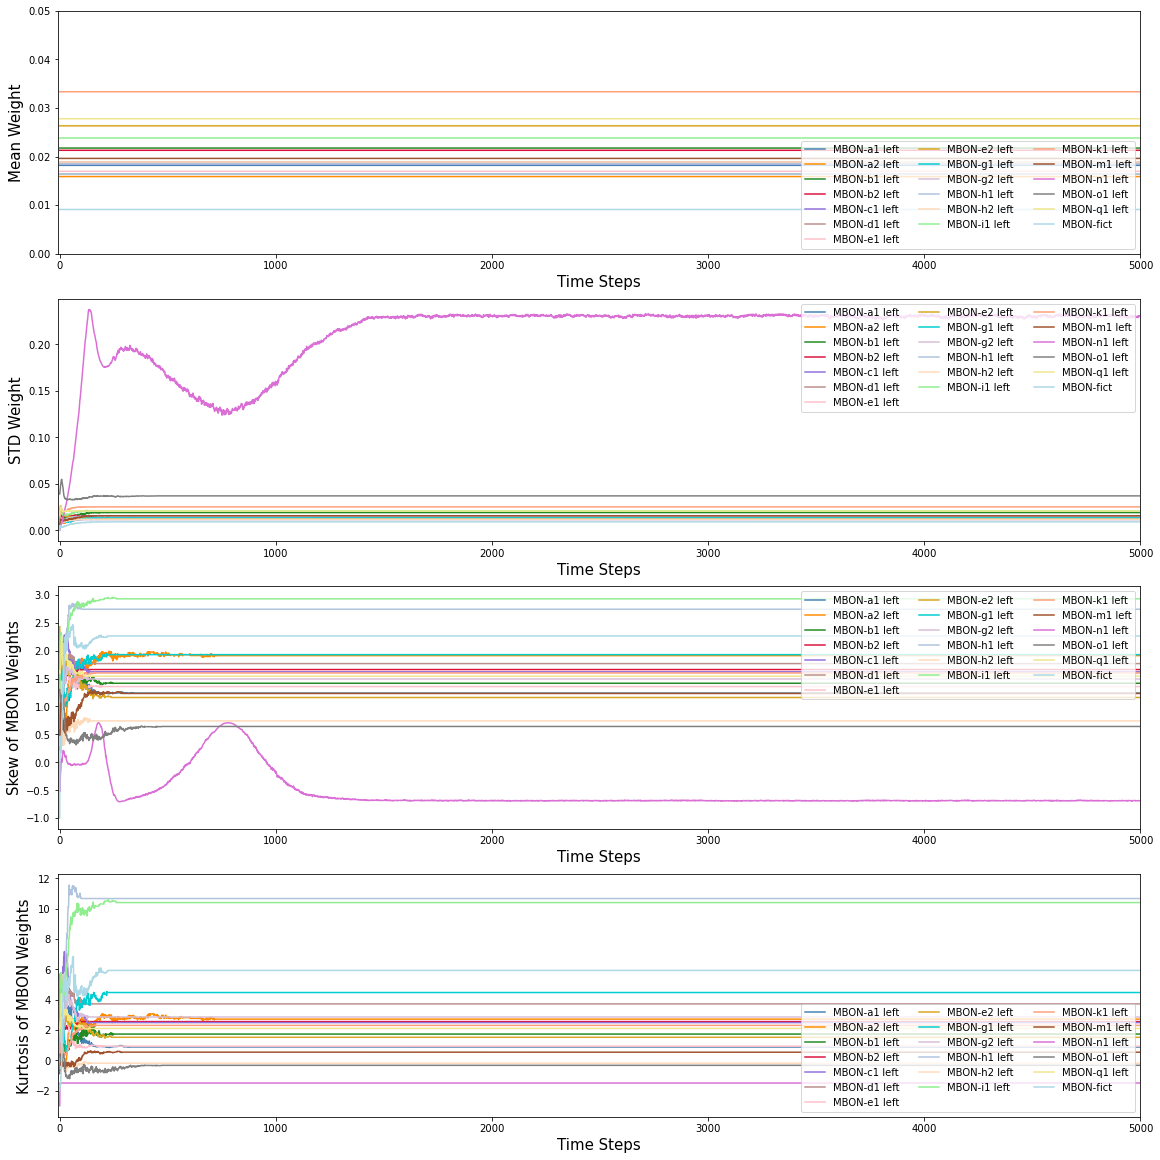

In [6]:
axis_fontsize = 15
title_fontsize = 20
fig8 = plt.figure(figsize=(16,16), constrained_layout=True)
gs8 = fig8.add_gridspec(ncols=3, nrows=8)

# 8A AVERAGE WEIGHT OVER TIME
f8_ax1 = fig8.add_subplot(gs8[0:2, :])

# average over realizations
avg_r_w = np.mean(abs(weights_over_time), axis=0)

avg_w = np.nanmean(avg_r_w, axis=1)
print(avg_w.shape)

x = np.linspace(0, 5000, 5000)
for i in range(num_mbons):
    f8_ax1.plot(x, avg_w[:,i], label = kc_mbon.columns[i], color = colors[i])
    
f8_ax1.legend(fontsize=10, loc='lower right', ncol = 3)
f8_ax1.set_xlim(-10, 5000)
f8_ax1.set_ylim(0, 0.05)
f8_ax1.set_xlabel("Time Steps", fontsize=axis_fontsize)
f8_ax1.set_ylabel("Mean Weight", fontsize=axis_fontsize)

# 8B STD WEIGHT OVER TIME
f8_ax2 = fig8.add_subplot(gs8[2:4, :])

# average over realizations
std_w = np.nanstd(avg_r_w, axis=1)

for i in range(num_mbons):
    f8_ax2.plot(x, std_w[:,i], label = kc_mbon.columns[i], color = colors[i])
    
f8_ax2.legend(fontsize=10, loc='upper right', ncol = 3)
f8_ax2.set_xlim(-10, 5000)
f8_ax2.set_xlabel("Time Steps", fontsize=axis_fontsize)
f8_ax2.set_ylabel("STD Weight", fontsize=axis_fontsize)

# 8C SKEW OF WEIGHTS OVER TIME
f8_ax3 = fig8.add_subplot(gs8[4:6, :])

# average over realizations
skew_w = st.skew(avg_r_w, axis=1, nan_policy='omit')

for i in range(num_mbons):
    f8_ax3.plot(x, skew_w[:,i], label = kc_mbon.columns[i], color = colors[i])
    
f8_ax3.legend(fontsize=10, loc='upper right', ncol = 3)
f8_ax3.set_xlim(-10, 5000)
f8_ax3.set_xlabel("Time Steps", fontsize=axis_fontsize)
f8_ax3.set_ylabel("Skew of MBON Weights", fontsize=axis_fontsize)

# 8C KURTOSIS OF WEIGHTS OVER TIME
f8_ax4 = fig8.add_subplot(gs8[6:, :])

# average over realizations
kurt_w = st.kurtosis(avg_r_w, axis=1, nan_policy='omit')

for i in range(num_mbons):
    f8_ax4.plot(x, kurt_w[:,i], label = kc_mbon.columns[i], color = colors[i])
    
f8_ax4.legend(fontsize=10, loc='lower right', ncol = 3)
f8_ax4.set_xlim(-10, 5000)
f8_ax4.set_xlabel("Time Steps", fontsize=axis_fontsize)
f8_ax4.set_ylabel("Kurtosis of MBON Weights", fontsize=axis_fontsize)

# KC output weights

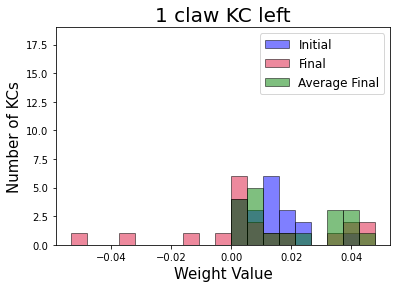

In [19]:
axis_fontsize = 15
title_fontsize = 20

# INITIAL AND FINAL WEIGHT DISTRIBUTIONS

# average weights with zeroes removed
avg_weights = np.mean(abs(weights_over_time), axis=0)

with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control/total-weights1.pkl', 'rb') as f:
    weights_over_time1 = pickle.load(f) # R, T, num_kcs, num_mbons

with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control2/total-weights1.pkl', 'rb') as f:
    weights_over_time2 = pickle.load(f) 

# concatenate arrays from both runs
weights_orig = np.concatenate((weights_over_time1, weights_over_time2), axis = 0)

x = np.zeros((3, num_mbons))
x[0] = kc_mbon.iloc[15]
x[1] = weights_orig[0, -1, 15] # final weights after realization #1 of training
x[2] = avg_weights[-1, 15]

# remove nans
temp = x[2]
x[2] = np.where(np.isnan(temp), 0, temp)

# plot
plt.figure()

# initial weights
plt.hist(x[0], bins=np.linspace(x.min(), x.max(), 20), edgecolor='black', color='blue', alpha=0.5, label='Initial')

# final weights after 1 training run
plt.hist(x[1], bins=np.linspace(x.min(), x.max(), 20), edgecolor='black', color='crimson', alpha=0.5, label='Final')

# plot average final weights across realizations
plt.hist(x[2], bins=np.linspace(x.min(), x.max(), 20), edgecolor='black', color='green', alpha=0.5, label='Average Final')

plt.title(kc_mbon.index[15], fontsize=title_fontsize)
plt.xlabel('Weight Value', fontsize=axis_fontsize)
plt.ylabel('Number of KCs', fontsize=axis_fontsize)
plt.ylim(0, num_mbons)
plt.legend(fontsize=12)

[  0.  17.  28.  42.  60.  68.  73. 110.]


Text(0, 0.5, 'Kurtosis of KC Weights')

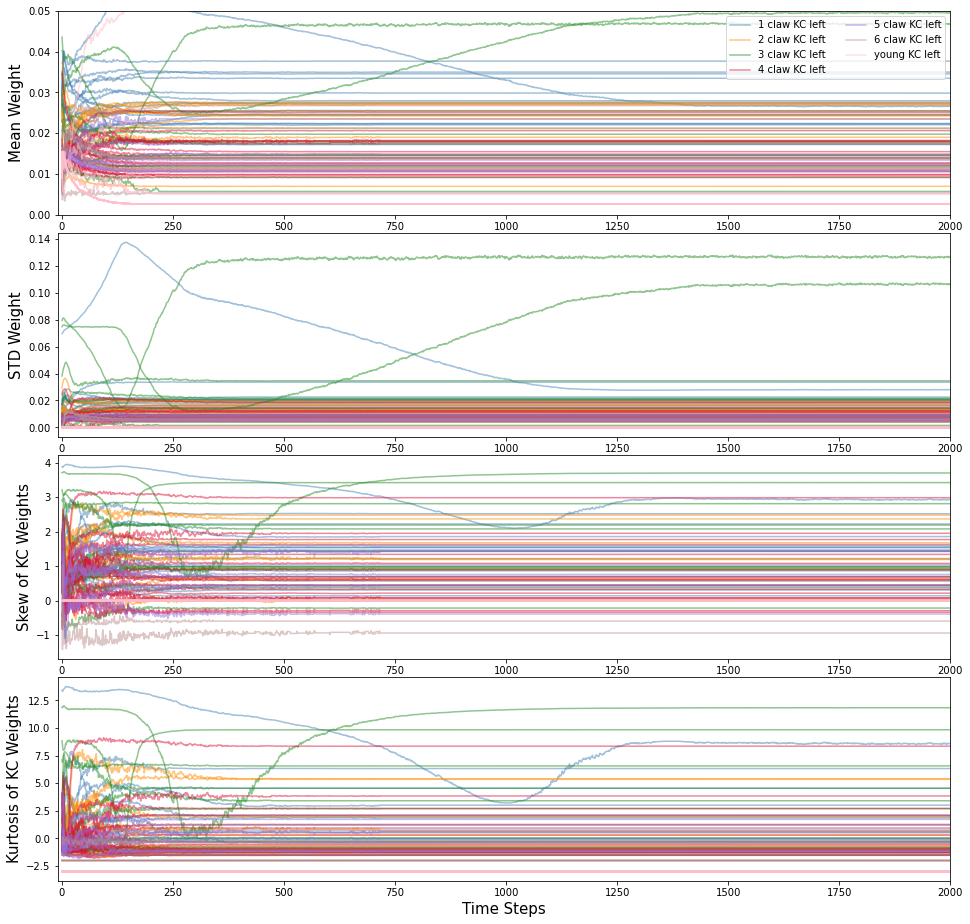

In [59]:
axis_fontsize = 15
title_fontsize = 20
fig9 = plt.figure(figsize=(16,16))
gs9 = fig9.add_gridspec(ncols=3, nrows=8)

# get counts of each KC type
names = ['1 claw KC left', '2 claw KC left', '3 claw KC left', '4 claw KC left', '5 claw KC left', '6 claw KC left', 'young KC left']
kc_counts = np.zeros(7)
for i in range(len(names)):
    kc_counts[i] = list(kc_mbon.index).count(names[i])

# the indices of the start of each KC type
kc_indices = np.cumsum(kc_counts)
kc_indices = np.roll(kc_indices, 1)
kc_indices[0] = 0
kc_indices = np.append(kc_indices, 110) # fix the index out of bound issue
print(kc_indices)

# 8A AVERAGE WEIGHT OVER TIME
f9_ax1 = fig9.add_subplot(gs8[0:2, :])

# average over realizations
avg_r_w = np.mean(abs(weights_over_time), axis=0)

avg_w = np.nanmean(avg_r_w, axis=2)

x = np.linspace(0, 5000, 5000)
a = 0
for i in range(num_kcs):
    lbl = names[a]
    if i == kc_indices[a]:
        f9_ax1.plot(x, avg_w[:,i], label = lbl, color = kc_color[lbl], alpha = 0.5) # only create label if at start index of type of KC
    else:
        f9_ax1.plot(x, avg_w[:,i], color = kc_color[lbl], alpha = 0.5) # otherwise don't use label
        if i+1 == kc_indices[a+1]: # if next index is the next KC type's first index, increase a by 1
            a += 1
    
f9_ax1.legend(fontsize=10, loc='upper right', ncol = 2)
f9_ax1.set_xlim(-10, 2000)
f9_ax1.set_ylim(0, 0.05)
f9_ax1.set_xlabel("Time Steps", fontsize=axis_fontsize)
f9_ax1.set_ylabel("Mean Weight", fontsize=axis_fontsize)

# 8B STD WEIGHT OVER TIME
f9_ax2 = fig9.add_subplot(gs9[2:4, :])

# average over realizations
std_w = np.nanstd(avg_r_w, axis=2)

for i in range(num_kcs):
    lbl = kc_mbon.index[i]
    f9_ax2.plot(x, std_w[:,i], label = lbl, color = kc_color[lbl], alpha = 0.5)
    
# f9_ax2.legend(fontsize=10, loc='upper right', ncol = 3)
f9_ax2.set_xlim(-10, 2000)
f9_ax2.set_xlabel("Time Steps", fontsize=axis_fontsize)
f9_ax2.set_ylabel("STD Weight", fontsize=axis_fontsize)

# 8C SKEW OF WEIGHTS OVER TIME
f9_ax3 = fig9.add_subplot(gs9[4:6, :])

# average over realizations
skew_w = st.skew(avg_r_w, axis=2, nan_policy='omit')

for i in range(num_kcs):
    lbl = kc_mbon.index[i]
    f9_ax3.plot(x, skew_w[:,i], label = lbl, color = kc_color[lbl], alpha = 0.5)
    
# f9_ax3.legend(fontsize=10, loc='upper right', ncol = 3)
f9_ax3.set_xlim(-10, 2000)
f9_ax3.set_xlabel("Time Steps", fontsize=axis_fontsize)
f9_ax3.set_ylabel("Skew of KC Weights", fontsize=axis_fontsize)

# 8C KURTOSIS OF WEIGHTS OVER TIME
f9_ax4 = fig9.add_subplot(gs8[6:, :])

# average over realizations
kurt_w = st.kurtosis(avg_r_w, axis=2, nan_policy='omit')

for i in range(num_kcs):
    lbl = kc_mbon.index[i]
    f9_ax4.plot(x, kurt_w[:,i], label = lbl, color = kc_color[lbl], alpha = 0.5)
    
# f9_ax4.legend(fontsize=10, loc='lower right', ncol = 3)
f9_ax4.set_xlim(-10, 2000)
f9_ax4.set_xlabel("Time Steps", fontsize=axis_fontsize)
f9_ax4.set_ylabel("Kurtosis of KC Weights", fontsize=axis_fontsize)

Text(0, 0.5, 'Kurtosis of KC Weights')

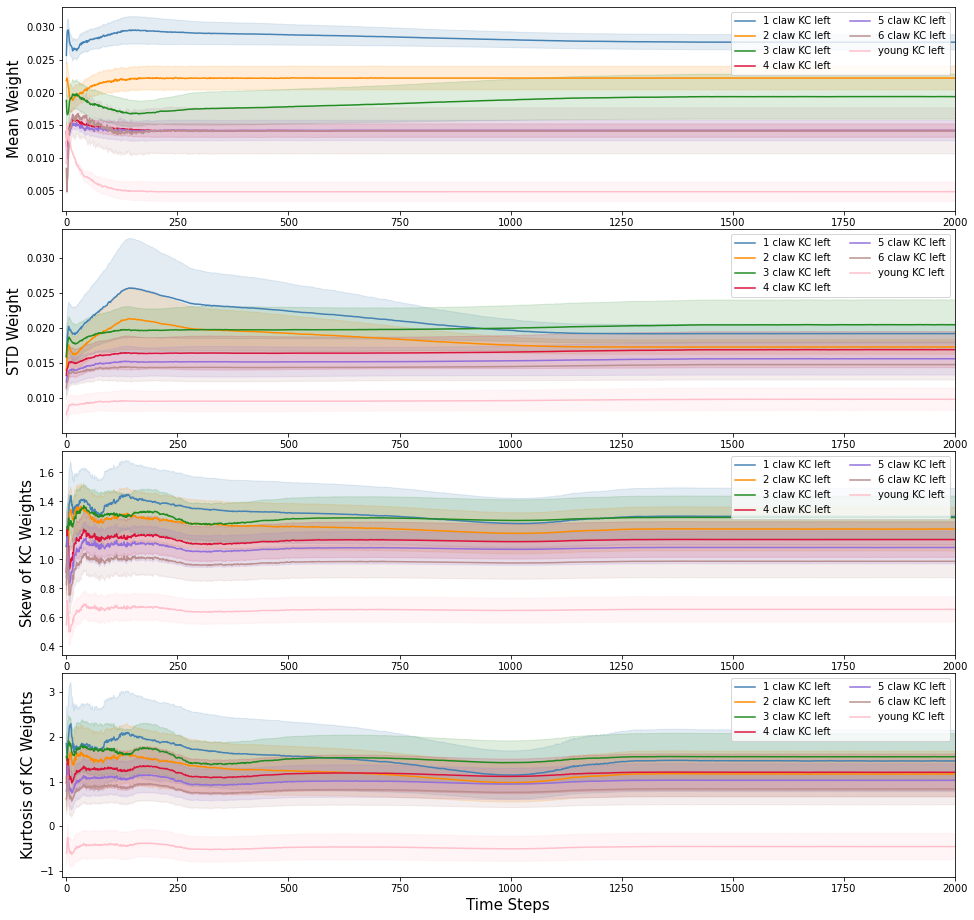

In [18]:
axis_fontsize = 15
title_fontsize = 20
fig10 = plt.figure(figsize=(16,16))
gs10 = fig10.add_gridspec(ncols=3, nrows=8)

# get counts of each KC type
names = ['1 claw KC left', '2 claw KC left', '3 claw KC left', '4 claw KC left', '5 claw KC left', '6 claw KC left', 'young KC left']
kc_counts = np.zeros(7)
for i in range(len(names)):
    kc_counts[i] = list(kc_mbon.index).count(names[i])

# the indices of the start of each KC type
kc_indices = (np.cumsum(kc_counts)).astype(int)

# dictionary of colors for each of 7 KC types
kc_color = {
    "1 claw KC left": 'steelblue',
    "2 claw KC left": 'darkorange',
    "3 claw KC left": 'forestgreen',
    "4 claw KC left": 'crimson',
    "5 claw KC left": 'mediumpurple',
    "6 claw KC left": 'rosybrown',
    "young KC left": 'pink'
}

# average over realizations
avg_r_w = np.mean(abs(weights_over_time), axis=0)

# 8A AVERAGE WEIGHT OVER TIME
f10_ax1 = fig10.add_subplot(gs10[0:2, :])

avg_w = np.nanmean(avg_r_w, axis=2)

x = np.linspace(0, 5000, 5000)

start = 0
for i in range(len(kc_indices)):
    lbl = names[i]
    end = kc_indices[i] # end index for kc type
    kc_group = avg_w[:, start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=1)
    sem_kc_group = st.sem(kc_group, axis=1)
    
    # plot
    f10_ax1.plot(x, avg_kc_group, label = lbl, color = kc_color[lbl])
    f10_ax1.fill_between(x, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    start = end # set start index for next kc type
    
f10_ax1.legend(fontsize=10, loc='upper right', ncol = 2)
f10_ax1.set_xlim(-10, 2000)
f10_ax1.set_xlabel("Time Steps", fontsize=axis_fontsize)
f10_ax1.set_ylabel("Mean Weight", fontsize=axis_fontsize)

# 8B STD WEIGHT OVER TIME
f10_ax2 = fig10.add_subplot(gs10[2:4, :])

# average over realizations
std_w = np.nanstd(avg_r_w, axis=2)

start = 0
for i in range(len(kc_indices)):
    lbl = names[i]
    end = kc_indices[i] # end index for kc type
    kc_group = std_w[:, start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=1)
    sem_kc_group = st.sem(kc_group, axis=1)
    
    # plot
    f10_ax2.plot(x, avg_kc_group, label = lbl, color = kc_color[lbl])
    f10_ax2.fill_between(x, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    
f10_ax2.legend(fontsize=10, loc='upper right', ncol = 2)
f10_ax2.set_xlim(-10, 2000)
f10_ax2.set_xlabel("Time Steps", fontsize=axis_fontsize)
f10_ax2.set_ylabel("STD Weight", fontsize=axis_fontsize)

# 8C SKEW OF WEIGHTS OVER TIME
f10_ax3 = fig10.add_subplot(gs10[4:6, :])

# average over realizations
skew_w = st.skew(avg_r_w, axis=2, nan_policy='omit')

for i in range(len(kc_indices)):
    lbl = names[i]
    end = kc_indices[i] # end index for kc type
    kc_group = skew_w[:, start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=1)
    sem_kc_group = st.sem(kc_group, axis=1)
    
    # plot
    f10_ax3.plot(x, avg_kc_group, label = lbl, color = kc_color[lbl])
    f10_ax3.fill_between(x, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    
f10_ax3.legend(fontsize=10, loc='upper right', ncol = 2)
f10_ax3.set_xlim(-10, 2000)
f10_ax3.set_xlabel("Time Steps", fontsize=axis_fontsize)
f10_ax3.set_ylabel("Skew of KC Weights", fontsize=axis_fontsize)

# 8C KURTOSIS OF WEIGHTS OVER TIME
f10_ax4 = fig10.add_subplot(gs10[6:, :])

# average over realizations
kurt_w = st.kurtosis(avg_r_w, axis=2, nan_policy='omit')

for i in range(len(kc_indices)):
    lbl = names[i]
    end = kc_indices[i] # end index for kc type
    kc_group = kurt_w[:, start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=1)
    sem_kc_group = st.sem(kc_group, axis=1)
    
    # plot
    f10_ax4.fill_between(x, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    f10_ax4.plot(x, avg_kc_group, label = lbl, color = kc_color[lbl])
    
f10_ax4.legend(fontsize=10, loc='upper right', ncol = 2)
f10_ax4.set_xlim(-10, 2000)
f10_ax4.set_xlabel("Time Steps", fontsize=axis_fontsize)
f10_ax4.set_ylabel("Kurtosis of KC Weights", fontsize=axis_fontsize)

# Sparsity over Time

In [73]:
# import weight data
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control/total-weights1.pkl', 'rb') as f:
    weights_over_time = pickle.load(f) # R, T, num_kcs, num_mbons

w_thresh = 0.005
    
# use threshold to determine number of true projections
avg_r_w = np.mean(abs(weights_over_time), axis=0) # average weight values over realizations
true_weights = np.where(avg_r_w > w_thresh, 1, 0)

# count number of projections
num_proj = np.zeros((num_kcs, T)) # store number of projections
np.sum(true_weights[0], axis=1)
for t in range(T):
    weights = true_weights[t] # get weight matrix at time step t
    num_proj[:, t] = np.sum(weights, axis=1) # number of projections
    
print(num_proj)

[[17. 17. 17. ... 17. 17. 17.]
 [15. 14. 15. ... 15. 15. 15.]
 [18. 18. 18. ... 18. 18. 18.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  0.  0.  0.]]


[  0.  17.  28.  42.  60.  68.  73. 110.]


Text(0, 0.5, 'Average % of KC Projections')

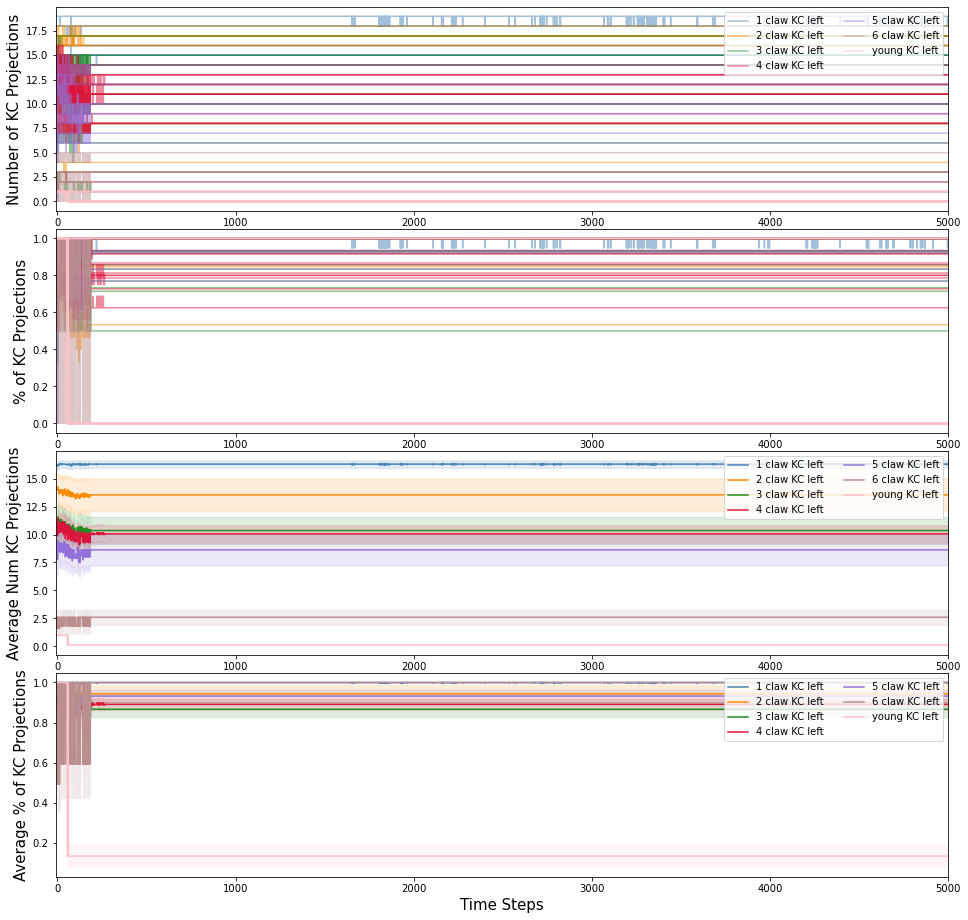

In [80]:
# create plot
axis_fontsize = 15
title_fontsize = 20
fig11 = plt.figure(figsize=(16,16))
gs11 = fig11.add_gridspec(ncols=3, nrows=8)

# get counts of each KC type
names = ['1 claw KC left', '2 claw KC left', '3 claw KC left', '4 claw KC left', '5 claw KC left', '6 claw KC left', 'young KC left']
kc_counts = np.zeros(7)
for i in range(len(names)):
    kc_counts[i] = list(kc_mbon.index).count(names[i])

# the indices of the start of each KC type
kc_indices = np.cumsum(kc_counts)
kc_indices = np.roll(kc_indices, 1)
kc_indices[0] = 0
kc_indices = np.append(kc_indices, 110) # fix the index out of bound issue
print(kc_indices)

# 11A SPARSITY OVER TIME
f11_ax1 = fig11.add_subplot(gs11[0:2, :])

x = np.linspace(0, 5000, 5000)
a = 0
for i in range(num_kcs):
    lbl = names[a]
    if i == kc_indices[a]:
        f11_ax1.plot(x, num_proj[i], label = lbl, color = kc_color[lbl], alpha = 0.5)
    else:
        f11_ax1.plot(x, num_proj[i], color = kc_color[lbl], alpha = 0.5)
        if i+1 == kc_indices[a+1]:
            a += 1
    
f11_ax1.legend(fontsize=10, loc='upper right', ncol = 2)
f11_ax1.set_xlim(-10, 5000)
f11_ax1.set_xlabel("Time Steps", fontsize=axis_fontsize)
f11_ax1.set_ylabel("Number of KC Projections", fontsize=axis_fontsize)

# 11B % SPARSITY OVER TIME
f11_ax2 = fig11.add_subplot(gs11[2:4, :])

# calculate fraction of initial projections
bool_weights = np.where(kc_mbon > 0, 1, 0)
init_proj = np.sum(bool_weights, axis=1)
frac_proj = np.zeros((num_kcs, T))
for t in range(T):
    frac_proj[:, t] = num_proj[:, t].astype(float) / init_proj.astype(float)

# plot
for i in range(num_kcs):
    lbl = kc_mbon.index[i]
    f11_ax2.plot(x, frac_proj[i], color = kc_color[lbl], alpha = 0.5)
    
# f11_ax2.legend(fontsize=10, loc='upper right', ncol = 2)
f11_ax2.set_xlim(-10, 5000)
f11_ax2.set_xlabel("Time Steps", fontsize=axis_fontsize)
f11_ax2.set_ylabel("% of KC Projections", fontsize=axis_fontsize)

# 11C AVERAGE (PER KC TYPE) SPARSITY OVER TIME
f11_ax3 = fig11.add_subplot(gs11[4:6, :])

# the indices of the start of each KC type - doesn't start with 0, starts with 17
kc_indices = (np.cumsum(kc_counts)).astype(int)

# average for each KC type
start = 0
for i in range(len(kc_indices)):
    lbl = names[i]
    end = kc_indices[i] # end index for kc type
    kc_group = num_proj[start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=0)
    sem_kc_group = st.sem(kc_group, axis=0)
    
    # plot
    f11_ax3.plot(x, avg_kc_group, label = lbl, color = kc_color[lbl])
    f11_ax3.fill_between(x, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    start = end # set start index for next kc type
    
f11_ax3.legend(fontsize=10, loc='upper right', ncol = 2)
f11_ax3.set_xlim(-10, 5000)
f11_ax3.set_xlabel("Time Steps", fontsize=axis_fontsize)
f11_ax3.set_ylabel("Average Num KC Projections", fontsize=axis_fontsize)

# 11D AVERAGE (PER KC TYPE) % SPARSITY OVER TIME
f11_ax4 = fig11.add_subplot(gs11[6:8, :])

start = 0
for i in range(len(kc_indices)):
    lbl = names[i]
    end = kc_indices[i] # end index for kc type
    kc_group = frac_proj[start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=0)
    sem_kc_group = st.sem(kc_group, axis=0)
    
    # plot
    f11_ax4.plot(x, avg_kc_group, label = lbl, color = kc_color[lbl])
    f11_ax4.fill_between(x, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    start = end # set start index for next kc type
    
f11_ax4.legend(fontsize=10, loc='upper right', ncol = 2)
f11_ax4.set_xlim(-10, 5000)
f11_ax4.set_xlabel("Time Steps", fontsize=axis_fontsize)
f11_ax4.set_ylabel("Average % of KC Projections", fontsize=axis_fontsize)

# Number of Connections vs. Weight Thresholds

In [84]:
names = ['1 claw KC left', '2 claw KC left', '3 claw KC left', '4 claw KC left', '5 claw KC left', 
         '6 claw KC left', 'young KC left']

# dictionary of colors for each of 7 KC types
kc_color = {
    "1 claw KC left": 'steelblue',
    "2 claw KC left": 'darkorange',
    "3 claw KC left": 'forestgreen',
    "4 claw KC left": 'crimson',
    "5 claw KC left": 'mediumpurple',
    "6 claw KC left": 'rosybrown',
    "young KC left": 'pink'
}

#TODO: add to class for kc_mbon
# get_kc_counts and get_kc_indices use kc_mbon to calculate the number of each KC type and indices for each KC type
def get_kc_counts():
    num_kc_types = len(names)
    
    # get counts of each KC type
    kc_counts = np.zeros(num_kc_types)
    for num in range(num_kc_types):
        kc_counts[num] = list(kc_mbon.index).count(names[num])
    return kc_counts

# get the indices of the end of each KC type
def get_kc_indices():
    kc_counts = get_kc_counts() # get the total count of each KC type
    kc_indices = (np.cumsum(kc_counts)).astype(int)
    return kc_indices

# plot average across each KC type
# rows must be KCs
# columns must be x
def plot_kc_group_average(x, y, axis):
    kc_indices = get_kc_indices()
    
    start = 0
    for idx in range(len(kc_indices)):
        lbl = names[idx]
        end = kc_indices[idx] # end index for KC type
        kc_group = y[start:end] # slice for a KC type

        # get mean and standard error of KC type
        avg_kc_group = np.mean(kc_group, axis=0)
        sem_kc_group = st.sem(kc_group, axis=0)

        # plot
        axis.plot(x, avg_kc_group, label = lbl, color = kc_color[lbl])
        axis.fill_between(x, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, 
                          color = kc_color[lbl])
        start = end # set start index for nex KC type

Text(0, 0.5, 'Average Diff in Num Proj.')

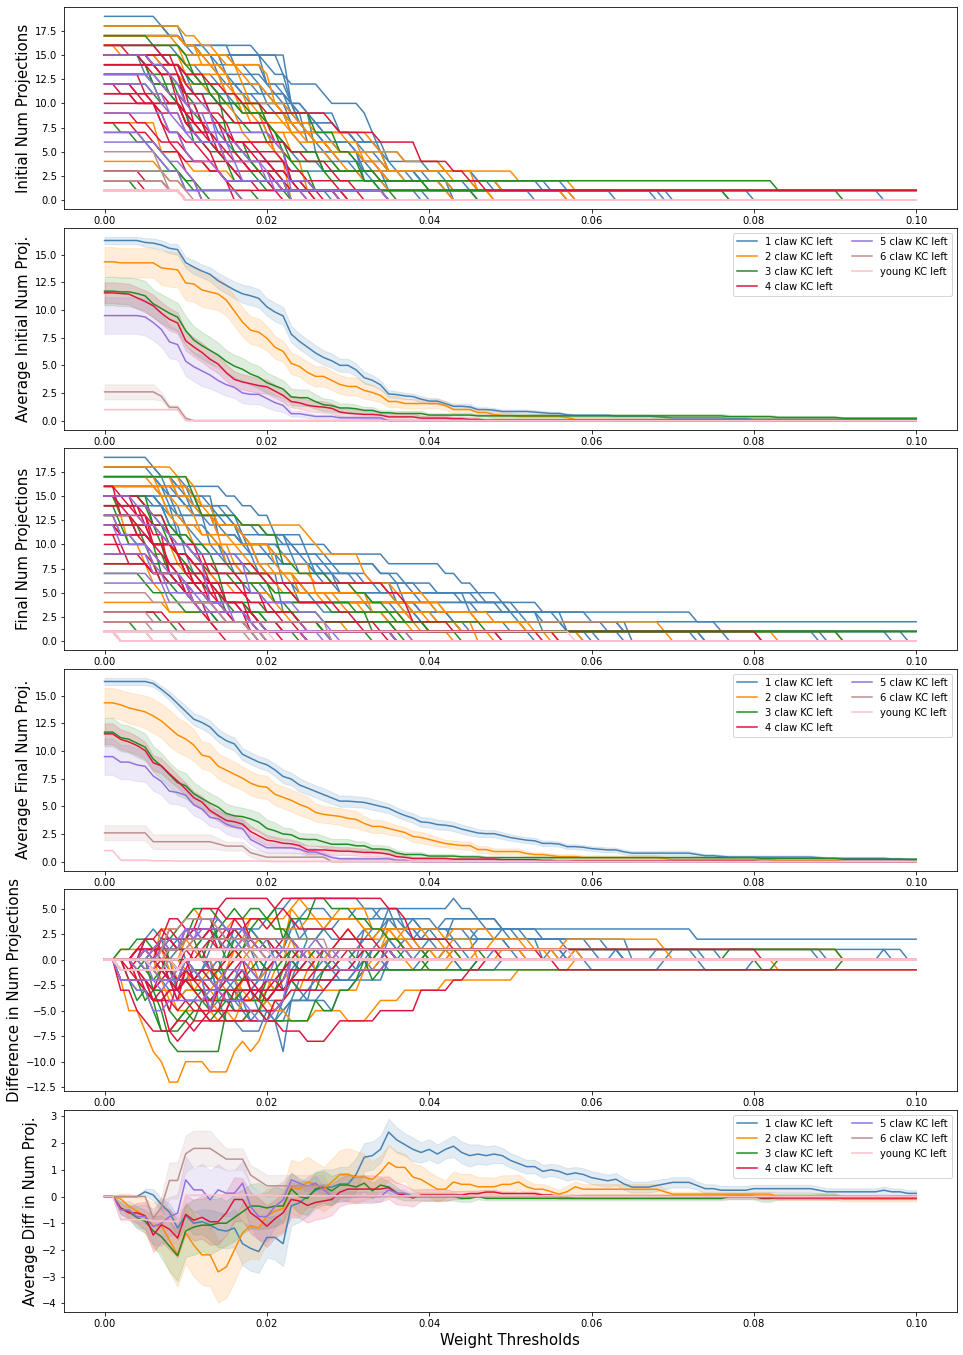

In [85]:
# import weight data
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control/total-weights1.pkl', 'rb') as f:
    weights_over_time = pickle.load(f) # R, T, num_kcs, num_mbons

w_thresh = np.linspace(0.0, 0.1, num=101) # x-axis
num_thresh = len(w_thresh)
    
avg_r_w = np.mean(abs(weights_over_time), axis=0) # average weight values over realizations

# create plot
axis_fontsize = 15
title_fontsize = 20
fig12 = plt.figure(figsize=(16,24))
gs12 = fig12.add_gridspec(ncols=3, nrows=12)

# INITIAL WEIGHTS - NUMBER OF PROJECTIONS VS WEIGHT THRESHOLDS
f12_ax1 = fig12.add_subplot(gs12[0:2, :])

initial_w = avg_r_w[0]

# determine number of outward projections for each KC w/ each threshold value
initial_num_proj = np.zeros((num_kcs, num_thresh))
for thresh in range(num_thresh):
    true_weights = np.where(initial_w > w_thresh[thresh], 1, 0) # 1s for weight values over the threshold
    initial_num_proj[:,thresh] = np.sum(true_weights, axis=1) # get number of projections per KC

for kc in range(num_kcs):
    lbl = kc_mbon.index[kc]
    f12_ax1.plot(w_thresh, initial_num_proj[kc], color = kc_color[lbl])
    
f12_ax1.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax1.set_ylabel("Initial Num Projections", fontsize=axis_fontsize)

# AVG INITIAL WEIGHTS PER KC TYPE - NUMBER OF PROJECTIONS VS WEIGHT THRESHOLDS
f12_ax2 = fig12.add_subplot(gs12[2:4, :])

plot_kc_group_average(w_thresh, initial_num_proj, f12_ax2)
    
f12_ax2.legend(fontsize=10, loc='upper right', ncol = 2)
f12_ax2.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax2.set_ylabel("Average Initial Num Proj.", fontsize=axis_fontsize)

# FINAL WEIGHTS - NUMBER OF PROJECTIONS VS WEIGHT THRESHOLDS
f12_ax3 = fig12.add_subplot(gs12[4:6, :])

final_w = avg_r_w[-1]
final_num_proj = np.zeros((num_kcs, num_thresh))
for thresh in range(num_thresh):
    true_weights = np.where(final_w > w_thresh[thresh], 1, 0) # 1s for weight values over the threshold
    final_num_proj[:,thresh] = np.sum(true_weights, axis=1) # get number of projections per KC
    
for kc in range(num_kcs):
    lbl = kc_mbon.index[kc]
    f12_ax3.plot(w_thresh, final_num_proj[kc], color = kc_color[lbl])
    
f12_ax3.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax3.set_ylabel("Final Num Projections", fontsize=axis_fontsize)

# AVG FINAL WEIGHTS PER KC TYPE - NUMBER OF PROJECTIONS VS WEIGHT THRESHOLDS
f12_ax4 = fig12.add_subplot(gs12[6:8, :])

plot_kc_group_average(w_thresh, final_num_proj, f12_ax4)
# start = 0
# for idx in range(len(kc_indices)):
#     lbl = names[idx]
#     end = kc_indices[idx] # end index for kc type
#     kc_group = final_num_proj[start:end] # slice for a kc type
    
#     # get mean and standard error of kc type
#     avg_kc_group = np.mean(kc_group, axis=0)
#     sem_kc_group = st.sem(kc_group, axis=0)
    
#     # plot
#     f12_ax4.plot(w_thresh, avg_kc_group, label = lbl, color = kc_color[lbl])
#     f12_ax4.fill_between(w_thresh, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
#     start = end # set start index for next kc type
    
f12_ax4.legend(fontsize=10, loc='upper right', ncol = 2)
f12_ax4.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax4.set_ylabel("Average Final Num Proj.", fontsize=axis_fontsize)

# DIFFERENCE IN NUM PROJECTIONS BETWEEN FINAL AND INITIAL WEIGHTS VS WEIGHT THRESHOLDS
f12_ax5 = fig12.add_subplot(gs12[8:10, :])

diff_num_proj = final_num_proj - initial_num_proj

for kc in range(num_kcs):
    lbl = kc_mbon.index[kc]
    f12_ax5.plot(w_thresh, diff_num_proj[kc], color = kc_color[lbl])
    
f12_ax5.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax5.set_ylabel("Difference in Num Projections", fontsize=axis_fontsize)

# AVG (PER KC TYPE) DIFFERENCE IN NUM PROJECTIONS BETWEEN FINAL AND INITIAL WEIGHTS VS WEIGHT THRESHOLDS
f12_ax6 = fig12.add_subplot(gs12[10:12, :])

start = 0
for idx in range(len(kc_indices)):
    lbl = names[idx]
    end = kc_indices[idx] # end index for kc type
    kc_group = diff_num_proj[start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=0)
    sem_kc_group = st.sem(kc_group, axis=0)
    
    # plot
    f12_ax6.plot(w_thresh, avg_kc_group, label = lbl, color = kc_color[lbl])
    f12_ax6.fill_between(w_thresh, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    start = end # set start index for next kc type
    
f12_ax6.legend(fontsize=10, loc='upper right', ncol = 2)
f12_ax6.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax6.set_ylabel("Average Diff in Num Proj.", fontsize=axis_fontsize)

# % Connections vs. Weight Thresholds

Text(0, 0.5, 'Average Diff in Num Proj.')

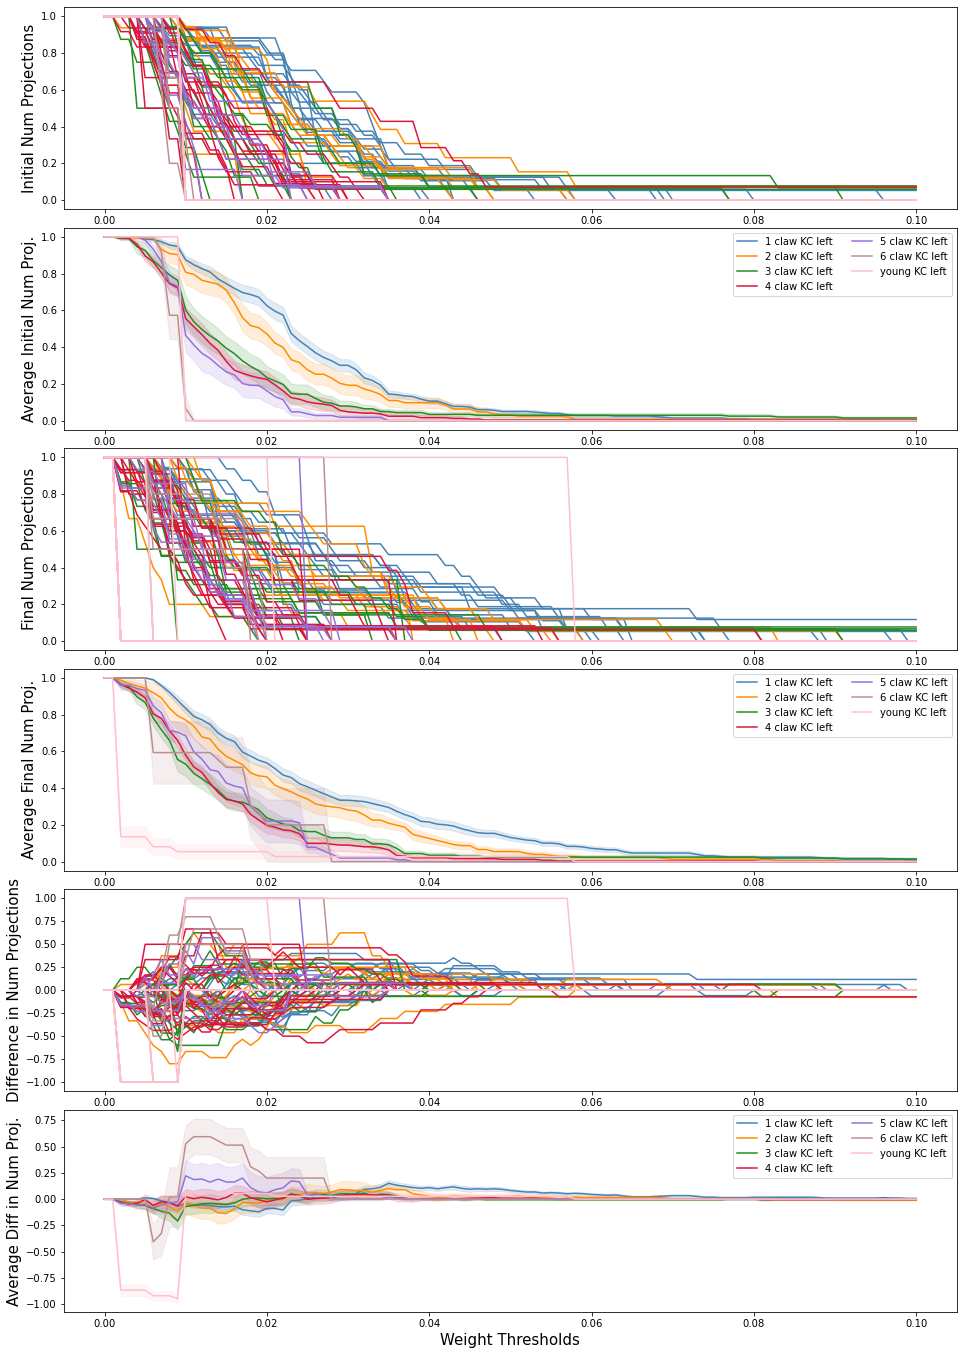

In [81]:
# import weight data
with open('C:/Katherine/Research/experiment-data-v3/10-odors-left/control/total-weights1.pkl', 'rb') as f:
    weights_over_time = pickle.load(f) # R, T, num_kcs, num_mbons

w_thresh = np.linspace(0.0, 0.1, num=101) # x-axis
num_thresh = len(w_thresh)
    
avg_r_w = np.mean(abs(weights_over_time), axis=0) # average weight values over realizations

# create plot
axis_fontsize = 15
title_fontsize = 20
fig12 = plt.figure(figsize=(16,24))
gs12 = fig12.add_gridspec(ncols=3, nrows=12)

# INITIAL WEIGHTS - NUMBER OF PROJECTIONS VS WEIGHT THRESHOLDS
f12_ax1 = fig12.add_subplot(gs12[0:2, :])

initial_w = avg_r_w[0]

# number of initial projections for each KC
bool_weights = np.where(kc_mbon > 0, 1, 0)
init_proj = np.sum(bool_weights, axis=1)

# determine number of outward projections for each KC w/ each threshold value
frac_initial_proj = np.zeros((num_kcs, num_thresh))
for thresh in range(num_thresh):
    true_weights = np.where(initial_w > w_thresh[thresh], 1, 0) # 1s for weight values over the threshold
    frac_initial_proj[:,thresh] = (np.sum(true_weights, axis=1)).astype(float) / init_proj.astype(float)

for kc in range(num_kcs):
    lbl = kc_mbon.index[kc]
    f12_ax1.plot(w_thresh, frac_initial_proj[kc], color = kc_color[lbl])
    
f12_ax1.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax1.set_ylabel("Initial Num Projections", fontsize=axis_fontsize)

# AVG INITIAL WEIGHTS PER KC TYPE - NUMBER OF PROJECTIONS VS WEIGHT THRESHOLDS
f12_ax2 = fig12.add_subplot(gs12[2:4, :])

# plot_kc_group_average(w_thresh, initial_num_proj, f12_ax2)
start = 0
for idx in range(len(kc_indices)):
    lbl = names[idx]
    end = kc_indices[idx] # end index for kc type
    kc_group = frac_initial_proj[start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=0)
    sem_kc_group = st.sem(kc_group, axis=0)
    
    # plot
    f12_ax2.plot(w_thresh, avg_kc_group, label = lbl, color = kc_color[lbl])
    f12_ax2.fill_between(w_thresh, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    start = end # set start index for next kc type
    
f12_ax2.legend(fontsize=10, loc='upper right', ncol = 2)
f12_ax2.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax2.set_ylabel("Average Initial Num Proj.", fontsize=axis_fontsize)

# FINAL WEIGHTS - NUMBER OF PROJECTIONS VS WEIGHT THRESHOLDS
f12_ax3 = fig12.add_subplot(gs12[4:6, :])

final_w = avg_r_w[-1]
frac_final_proj = np.zeros((num_kcs, num_thresh))
for thresh in range(num_thresh):
    true_weights = np.where(final_w > w_thresh[thresh], 1, 0) # 1s for weight values over the threshold
    frac_final_proj[:,thresh] = (np.sum(true_weights, axis=1)).astype(float) / init_proj.astype(float)
    
for kc in range(num_kcs):
    lbl = kc_mbon.index[kc]
    f12_ax3.plot(w_thresh, frac_final_proj[kc], color = kc_color[lbl])
    
f12_ax3.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax3.set_ylabel("Final Num Projections", fontsize=axis_fontsize)

# AVG FINAL WEIGHTS PER KC TYPE - NUMBER OF PROJECTIONS VS WEIGHT THRESHOLDS
f12_ax4 = fig12.add_subplot(gs12[6:8, :])

# plot_kc_group_average(w_thresh, initial_num_proj, f12_ax2)
start = 0
for idx in range(len(kc_indices)):
    lbl = names[idx]
    end = kc_indices[idx] # end index for kc type
    kc_group = frac_final_proj[start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=0)
    sem_kc_group = st.sem(kc_group, axis=0)
    
    # plot
    f12_ax4.plot(w_thresh, avg_kc_group, label = lbl, color = kc_color[lbl])
    f12_ax4.fill_between(w_thresh, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    start = end # set start index for next kc type
    
f12_ax4.legend(fontsize=10, loc='upper right', ncol = 2)
f12_ax4.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax4.set_ylabel("Average Final Num Proj.", fontsize=axis_fontsize)

# DIFFERENCE IN NUM PROJECTIONS BETWEEN FINAL AND INITIAL WEIGHTS VS WEIGHT THRESHOLDS
f12_ax5 = fig12.add_subplot(gs12[8:10, :])

diff_num_proj = frac_final_proj - frac_initial_proj

for kc in range(num_kcs):
    lbl = kc_mbon.index[kc]
    f12_ax5.plot(w_thresh, diff_num_proj[kc], color = kc_color[lbl])
    
f12_ax5.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax5.set_ylabel("Difference in Num Projections", fontsize=axis_fontsize)

# AVG (PER KC TYPE) DIFFERENCE IN NUM PROJECTIONS BETWEEN FINAL AND INITIAL WEIGHTS VS WEIGHT THRESHOLDS
f12_ax6 = fig12.add_subplot(gs12[10:12, :])

start = 0
for idx in range(len(kc_indices)):
    lbl = names[idx]
    end = kc_indices[idx] # end index for kc type
    kc_group = diff_num_proj[start:end] # slice for a kc type
    
    # get mean and standard error of kc type
    avg_kc_group = np.mean(kc_group, axis=0)
    sem_kc_group = st.sem(kc_group, axis=0)
    
    # plot
    f12_ax6.plot(w_thresh, avg_kc_group, label = lbl, color = kc_color[lbl])
    f12_ax6.fill_between(w_thresh, avg_kc_group-sem_kc_group, avg_kc_group+sem_kc_group, alpha = 0.15, color = kc_color[lbl])
    start = end # set start index for next kc type
    
f12_ax6.legend(fontsize=10, loc='upper right', ncol = 2)
f12_ax6.set_xlabel("Weight Thresholds", fontsize=axis_fontsize)
f12_ax6.set_ylabel("Average Diff in Num Proj.", fontsize=axis_fontsize)